# Q1.Predict delivery time using sorting time Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("E:\Assisgnments\SimpleLinearRegression\delivery_time.csv")

In [3]:
data.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In [4]:
data.shape

(21, 2)

In [5]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [6]:
data=data.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
data.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [9]:
data.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [ ]:
data.describe()

# Data Visualization

C:\Users\Simran Shaikh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

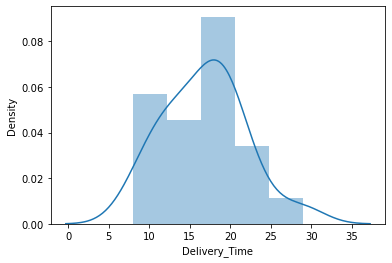

In [26]:
sns.distplot(data['Delivery_Time'])

C:\Users\Simran Shaikh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

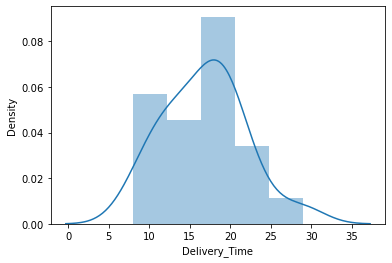

In [27]:
sns.distplot(data['Delivery_Time'])

# Correlation Analysis

In [11]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


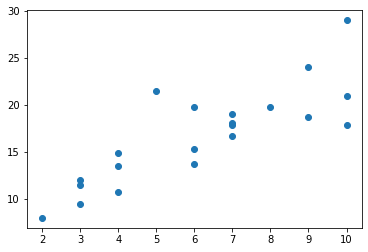

In [12]:
plt.scatter(data['Sorting_Time'],data['Delivery_Time'])

In [13]:
reg=linear_model.LinearRegression().fit(data[['Sorting_Time']],data['Delivery_Time'])

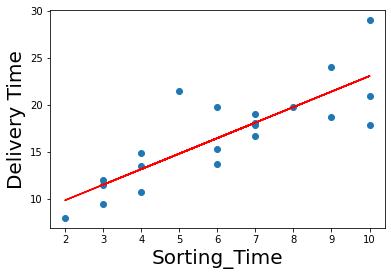

In [14]:
plt.xlabel('Sorting_Time',fontsize=20)
plt.ylabel('Delivery Time',fontsize=20)
plt.scatter(data['Sorting_Time'],data['Delivery_Time'])
plt.plot(data['Sorting_Time'],reg.predict(data[['Sorting_Time']]),color='red')

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

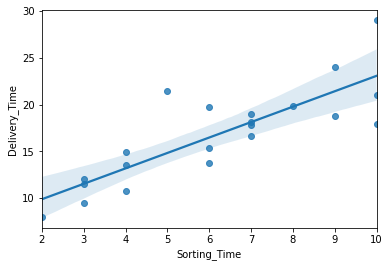

In [15]:
#or
sns.regplot(x=data['Sorting_Time'],y=data['Delivery_Time'])

# Model Building

In [28]:
model=smf.ols("Delivery_Time~Sorting_Time",data=data).fit()

# Model Testing

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        19:12:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

# Model Prediction

In [21]:
Delivery_Time=(10)*(1.649020)+(6.582734)
Delivery_Time

23.072933999999997

In [22]:
data1=pd.Series([10,18])
data1

0    10
1    18
dtype: int64

In [23]:
data_pred=pd.DataFrame(data1,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,10
1,18


In [24]:
model.predict(data_pred)

0    23.072933
1    36.265092
dtype: float64